In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("sujal_minor.csv")

In [3]:
df.head()

normalized_rms  signal_length  sampling_rate  mag_mean   mag_std   mag_var  \
0            True        1000000   2.000000e+10  0.980348  0.197274  0.038917   
1            True        1000000   2.000000e+10  0.979547  0.201217  0.040488   
2            True        1000000   2.000000e+10  0.979992  0.199037  0.039616   
3            True        1000000   2.000000e+10  0.979667  0.200632  0.040253   
4            True        1000000   2.000000e+10  0.980624  0.195897  0.038376   

   mag_rms   mag_max   mag_min  mag_range  ...  spectral_rolloff_95  \
0      1.0  2.052520  0.022202   2.030318  ...         5.795898e+09   
1      1.0  2.058299  0.040849   2.017451  ...         5.776367e+09   
2      1.0  2.070068  0.039672   2.030396  ...         5.771484e+09   
3      1.0  1.939665  0.073675   1.865990  ...         5.786133e+09   
4      1.0  1.928478  0.055234   1.873244  ...         5.786133e+09   

   phase_circular_mean  phase_circular_variance  phase_circular_std  \
0             3.133368                 0.022537            0.213516   
1             3.135412                 0.023583            0.218474   
2             3.136081                 0.023028            0.215857   
3             3.137807                 0.023461            0.217900   
4             3.135089                 0.022225            0.212019   

   burst_duty_cycle  num_peaks  peak_prominence_mean           device  \
0          0.021521    14229.0                   0.0  DJI_Inspire1Pro   
1          0.021654    14145.0                   0.0  DJI_Inspire1Pro   
2          0.021346    13984.0                   0.0  DJI_Inspire1Pro   
3          0.021074    14006.0                   0.0  DJI_Inspire1Pro   
4          0.021535    14191.0                   0.0  DJI_Inspire1Pro   

      device_class                  filename  
0  DJI_Inspire1Pro  DJI_Inspire1Pro_0001.mat  
1  DJI_Inspire1Pro  DJI_Inspire1Pro_0002.mat  
2  DJI_Inspire1Pro  DJI_Inspire1Pro_0003.mat  
3  DJI_Inspire1Pro  DJI_Inspire1Pro_0004.mat  
4  DJI_Inspire1Pro  DJI_Inspire1Pro_0005.mat  

[5 rows x 65 columns]

In [4]:
df['peak_prominence_mean'].nunique()

1

In [5]:
df["device_class"].unique()

array(['DJI_Inspire1Pro', 'DJI_Phantom3', 'DJI_Phantom4Pro_1',
       'DJI_Phantom4Pro_2', 'FlySky_FST6', 'Futaba_T8FG', 'Graupner_MC32',
       'DJI_Matrice100', 'HobbyKing_HKT6A', 'JetiDuplex_DC16',
       'Spektrum_DX5e', 'Spektrum_DX6e', 'Spektrum_DX6i',
       'Spektrum_JRX9303', 'Turnigy_9X', 'DJI_Matrice600_1',
       'DJI_Matrice600_2'], dtype=object)

In [6]:
df["device"].unique()

array(['DJI_Inspire1Pro', 'DJI_Phantom3', 'DJI_Phantom4Pro_1',
       'DJI_Phantom4Pro_2', 'FlySky_FST6', 'Futaba_T8FG', 'Graupner_MC32',
       'DJI_Matrice100', 'HobbyKing_HKT6A', 'JetiDuplex_DC16',
       'Spektrum_DX5e', 'Spektrum_DX6e', 'Spektrum_DX6i',
       'Spektrum_JRX9303', 'Turnigy_9X', 'DJI_Matrice600_1',
       'DJI_Matrice600_2'], dtype=object)

In [7]:
rf_data=df.drop(columns=["normalized_rms","signal_length","sampling_rate","peak_prominence_mean","device_class","filename"])

In [8]:
rf_data

mag_mean   mag_std   mag_var  mag_rms   mag_max   mag_min  mag_range  \
0      0.980348  0.197274  0.038917      1.0  2.052520  0.022202   2.030318   
1      0.979547  0.201217  0.040488      1.0  2.058299  0.040849   2.017451   
2      0.979992  0.199037  0.039616      1.0  2.070068  0.039672   2.030396   
3      0.979667  0.200632  0.040253      1.0  1.939665  0.073675   1.865990   
4      0.980624  0.195897  0.038376      1.0  1.928478  0.055234   1.873244   
...         ...       ...       ...      ...       ...       ...        ...   
17543  0.978641  0.205574  0.042261      1.0  5.014396  0.060684   4.953712   
17544  0.978078  0.208237  0.043363      1.0  5.368888  0.034270   5.334619   
17545  0.977940  0.208884  0.043633      1.0  7.013061  0.025179   6.987882   
17546  0.978801  0.204814  0.041949      1.0  7.239172  0.036929   7.202243   
17547  0.978394  0.206749  0.042745      1.0  6.395355  0.094621   6.300734   

       mag_peak_to_avg  mag_skewness  mag_kurtosis  ...  \
0             2.093664     -0.014486     -0.039814  ...   
1             2.101278     -0.013936     -0.042190  ...   
2             2.112331     -0.018610     -0.037206  ...   
3             1.979924     -0.025078     -0.072423  ...   
4             1.966581     -0.019578     -0.031298  ...   
...                ...           ...           ...  ...   
17543         5.123833     -0.018116     -0.046513  ...   
17544         5.489221     -0.022442     -0.004271  ...   
17545         7.171257     -0.005179      0.512486  ...   
17546         7.395959     -0.001275      0.717784  ...   
17547         6.536584     -0.010151      0.286998  ...   

       spectral_centroid_mag  spectral_bandwidth_mag  spectral_rolloff_85  \
0               2.215213e+09            1.746761e+09         4.565430e+09   
1               2.185224e+09            1.720553e+09         4.472656e+09   
2               2.158923e+09            1.730092e+09         4.482422e+09   
3               2.188827e+09            1.720883e+09         4.497070e+09   
4               2.178098e+09            1.743836e+09         4.521484e+09   
...                      ...                     ...                  ...   
17543           2.101322e+09            1.623168e+09         4.228516e+09   
17544           2.055575e+09            1.605529e+09         4.101562e+09   
17545           2.057309e+09            1.615993e+09         4.135742e+09   
17546           2.096007e+09            1.636996e+09         4.243164e+09   
17547           2.088751e+09            1.623555e+09         4.204102e+09   

       spectral_rolloff_95  phase_circular_mean  phase_circular_variance  \
0             5.795898e+09             3.133368                 0.022537   
1             5.776367e+09             3.135412                 0.023583   
2             5.771484e+09             3.136081                 0.023028   
3             5.786133e+09             3.137807                 0.023461   
4             5.786133e+09             3.135089                 0.022225   
...                    ...                  ...                      ...   
17543         5.703125e+09             3.133744                 0.024687   
17544         5.678711e+09             3.133723                 0.025492   
17545         5.683594e+09             3.133630                 0.025654   
17546         5.712891e+09             3.139282                 0.024565   
17547         5.698242e+09             3.135093                 0.025054   

       phase_circular_std  burst_duty_cycle  num_peaks           device  
0                0.213516          0.021521    14229.0  DJI_Inspire1Pro  
1                0.218474          0.021654    14145.0  DJI_Inspire1Pro  
2                0.215857          0.021346    13984.0  DJI_Inspire1Pro  
3                0.217900          0.021074    14006.0  DJI_Inspire1Pro  
4                0.212019          0.021535    14191.0  DJI_Inspire1Pro  
...                   ...               ...        ...             

In [10]:
rf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548 entries, 0 to 17547
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mag_mean                 17548 non-null  float64
 1   mag_std                  17548 non-null  float64
 2   mag_var                  17548 non-null  float64
 3   mag_rms                  17548 non-null  float64
 4   mag_max                  17548 non-null  float64
 5   mag_min                  17548 non-null  float64
 6   mag_range                17548 non-null  float64
 7   mag_peak_to_avg          17548 non-null  float64
 8   mag_skewness             17548 non-null  float64
 9   mag_kurtosis             17548 non-null  float64
 10  i_mean                   17548 non-null  float64
 11  i_std                    17548 non-null  float64
 12  i_var                    17548 non-null  float64
 13  i_skewness               17548 non-null  float64
 14  i_kurtosis            

In [12]:
df["evm"]

0        0.247549
1        0.251925
2        0.249627
3        0.251787
4        0.246122
           ...   
17543    0.259697
17544    0.262756
17545    0.262940
17546    0.258251
17547    0.260659
Name: evm, Length: 17548, dtype: float64

In [21]:
df["evm_rms"]

0        0.274941
1        0.279611
2        0.277097
3        0.279119
4        0.273407
           ...   
17543    0.286218
17544    0.289355
17545    0.289870
17546    0.284991
17547    0.287430
Name: evm_rms, Length: 17548, dtype: float64

In [23]:
rf_data_X=rf_data.drop(columns=["device"])

In [25]:
rf_data_X.corr()

mag_mean   mag_std   mag_var   mag_rms   mag_max  \
mag_mean                 1.000000 -0.893077 -0.996773  0.261303 -0.289935   
mag_std                 -0.893077  1.000000  0.919605 -0.462273  0.443953   
mag_var                 -0.996773  0.919605  1.000000 -0.284920  0.311328   
mag_rms                  0.261303 -0.462273 -0.284920  1.000000 -0.793671   
mag_max                 -0.289935  0.443953  0.311328 -0.793671  1.000000   
mag_min                  0.549877 -0.830308 -0.584550  0.580261 -0.491056   
mag_range               -0.324861  0.496409  0.348314 -0.808073  0.997071   
mag_peak_to_avg         -0.317297  0.464535  0.338261 -0.792323  0.999417   
mag_skewness            -0.188219  0.107895  0.164772 -0.241372  0.328540   
mag_kurtosis             0.053336 -0.005922 -0.056346 -0.388630  0.549442   
i_mean                  -0.502537  0.403172  0.502713  0.016712  0.024562   
i_std                   -0.741341  0.801503  0.765192 -0.286135  0.291787   
i_var                   -0.626593  0.558457  0.635069 -0.058245  0.100588   
i_skewness              -0.294769  0.460888  0.314658 -0.275481  0.200459   
i_kurtosis              -0.042094  0.012442  0.026269 -0.123493  0.140904   
i_rms                    0.599409 -0.520797 -0.605611  0.036107 -0.079315   
q_mean                  -0.262398  0.501824  0.288561 -0.621206  0.448921   
q_std                   -0.741345  0.801668  0.765207 -0.286950  0.292718   
q_var                   -0.626751  0.558735  0.635243 -0.058823  0.101242   
q_skewness               0.084923 -0.121172 -0.091000  0.137617 -0.113045   
q_kurtosis               0.043856 -0.007761 -0.050186 -0.432262  0.622614   
q_rms                   -0.741334  0.801755  0.765201 -0.287237  0.292886   
iq_imbalance_dc          0.494721 -0.389097 -0.494195 -0.033325 -0.012498   
iq_imbalance_power_db   -0.075200 -0.024765  0.073423  0.593787 -0.703360   
iq_correlation          -0.017408  0.017193  0.018135 -0.004340 -0.008444   
iq_power_ratio          -0.075148 -0.024942  0.073361  0.594231 -0.703747   
iq_amplitude_ratio       0.585003 -0.842323 -0.618794  0.555276 -0.485635   
phase_mean               0.063772  0.084384 -0.058515 -0.440696  0.285682   
phase_std                0.526491 -0.543947 -0.547253  0.107493 -0.133871   
phase_var                0.576153 -0.608158 -0.599479  0.147478 -0.170378   
phase_range              0.290443 -0.308132 -0.305033  0.043801 -0.070457   
phase_skewness          -0.041070 -0.115172  0.034291  0.459892 -0.301727   
phase_kurtosis          -0.240073  0.168988  0.242583  0.098830 -0.062814   
phase_unwrapped_slope   -0.233839  0.172183  0.238343  0.134253 -0.091327   
phase_unwrapped_mean    -0.210787  0.159388  0.216501  0.131820 -0.089477   
phase_unwrapped_std     -0.243004  0.177111  0.246887  0.134803 -0.091492   
phase_unwrapped_range   -0.239877  0.174652  0.243606  0.134587 -0.091176   
inst_freq_mean          -0.239874  0.174648  0.243603  0.134592 -0.091179   
inst_freq_std           -0.695550  0.755754  0.725575 -0.219302  0.235561   
inst_freq_var           -0.417585  0.392574  0.433701  0.002052  0.039188   
inst_freq_range         -0.612204  0.832067  0.647431 -0.548256  0.443874   
inst_freq_skewness       0.500650 -0.778685 -0.547090  0.536715 -0.464158   
inst_freq_kurtosis      -0.528128  0.629953  0.560131 -0.388910  0.420457   
freq_acceleration_mean  -0.007471  0.027339  0.007239 -0.071323  0.078449   
freq_acceleration_std   -0.608527  0.701119  0.641087 -0.231356  0.241333   
am_depth                -0.498246  0.780245  0.530453 -0.627190  0.570311   
amplitude_variation     -0.944619  0.989468  0.960390 -0.421336  0.412265   
evm                     -0.871713  0.987266  0.896755 -0.461651  0.431039   
evm_rms                 -0.889651  0.986921  0.909826 -0.462263  0.434441   
spectral_centroid_mag    0.162029 -0.242858 -0.175582  0.256589 -0.267299   
spectral_bandwidth_mag   0.566922 -0.518766 -0.583508  0.000420 -0.059193   
spectral_rolloff_85  

In [27]:
print("Unique Values for Each Column:")
for col in rf_data_X.columns:
    unique_count = rf_data_X[col].nunique()
    unique_values = rf_data_X[col].unique()
    print(f"Column {col}: {unique_count} unique values {unique_values}")

Unique Values for Each Column:
Column mag_mean: 17546 unique values [0.98034838 0.9795466  0.97999205 ... 0.97794036 0.97880096 0.97839405]
Column mag_std: 17546 unique values [0.19727408 0.20121744 0.19903665 ... 0.2088843  0.20481378 0.20674882]
Column mag_var: 17546 unique values [0.03891706 0.04048846 0.03961559 ... 0.04363265 0.04194868 0.04274508]
Column mag_rms: 14651 unique values [1. 1. 1. ... 1. 1. 1.]
Column mag_max: 17546 unique values [2.05251989 2.05829933 2.07006805 ... 7.01306137 7.23917208 6.39535493]
Column mag_min: 17546 unique values [0.02220151 0.04084866 0.03967249 ... 0.02517919 0.03692911 0.09462139]
Column mag_range: 17546 unique values [2.03031838 2.01745066 2.03039556 ... 6.98788217 7.20224297 6.30073354]
Column mag_peak_to_avg: 17546 unique values [2.09366379 2.1012776  2.11233148 ... 7.1712567  7.39595933 6.53658401]
Column mag_skewness: 17546 unique values [-0.01448578 -0.01393619 -0.01861047 ... -0.00517905 -0.00127506
 -0.01015123]
Column mag_kurtosis: 1

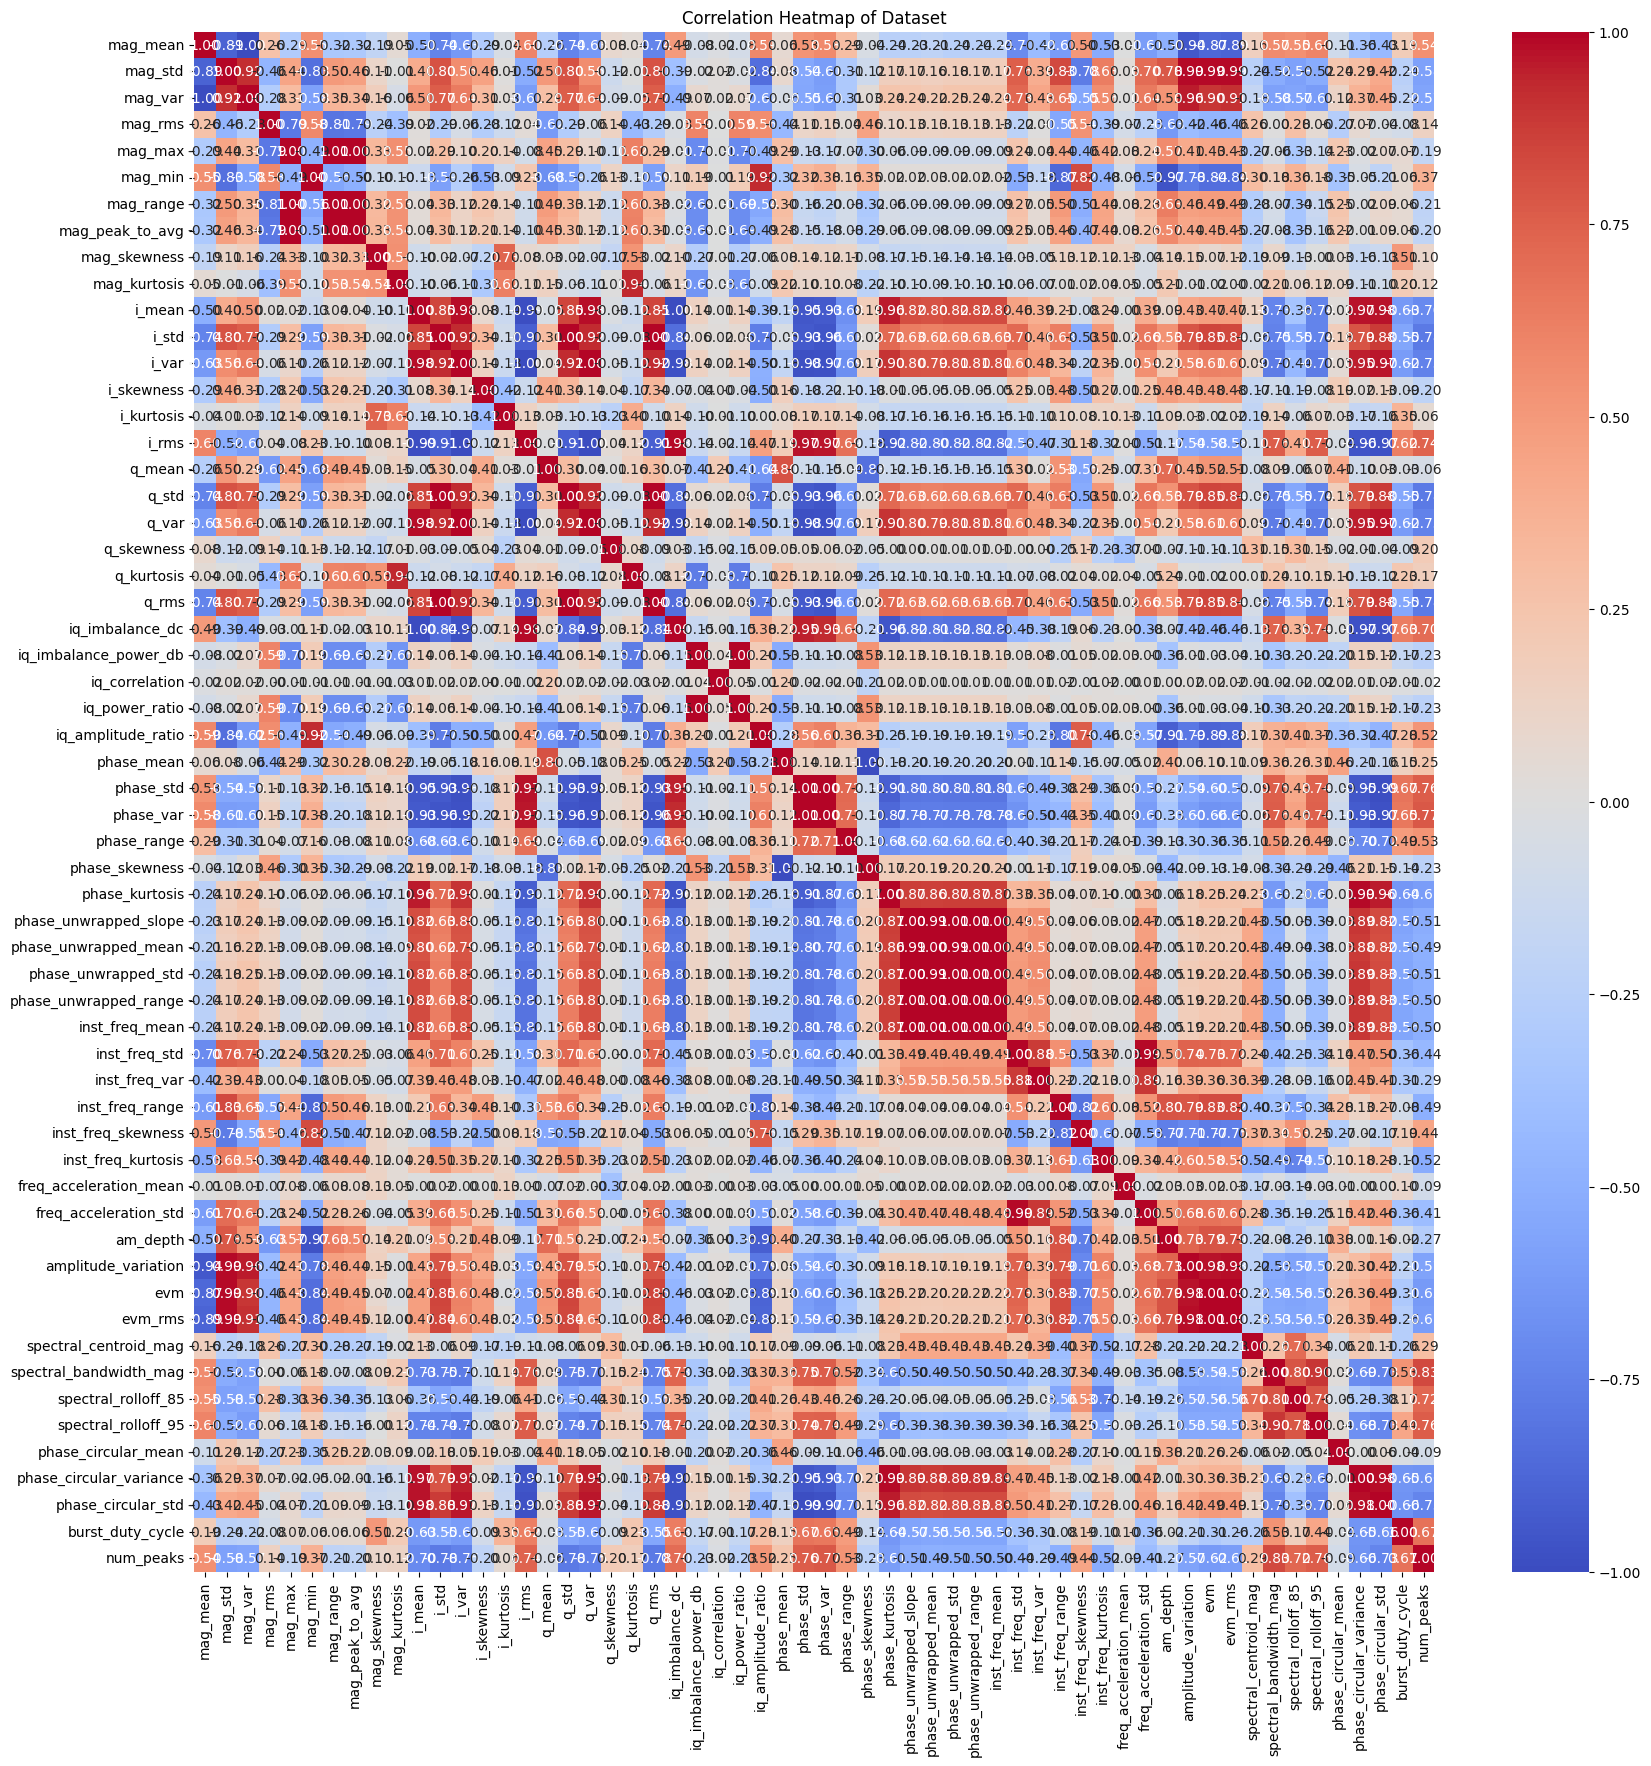

In [29]:
import seaborn as sns
corr_matrix = rf_data_X.corr()

# Create heatmap
plt.figure(figsize=(20, 20))  # Adjust size based on number of columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Dataset')
plt.show()

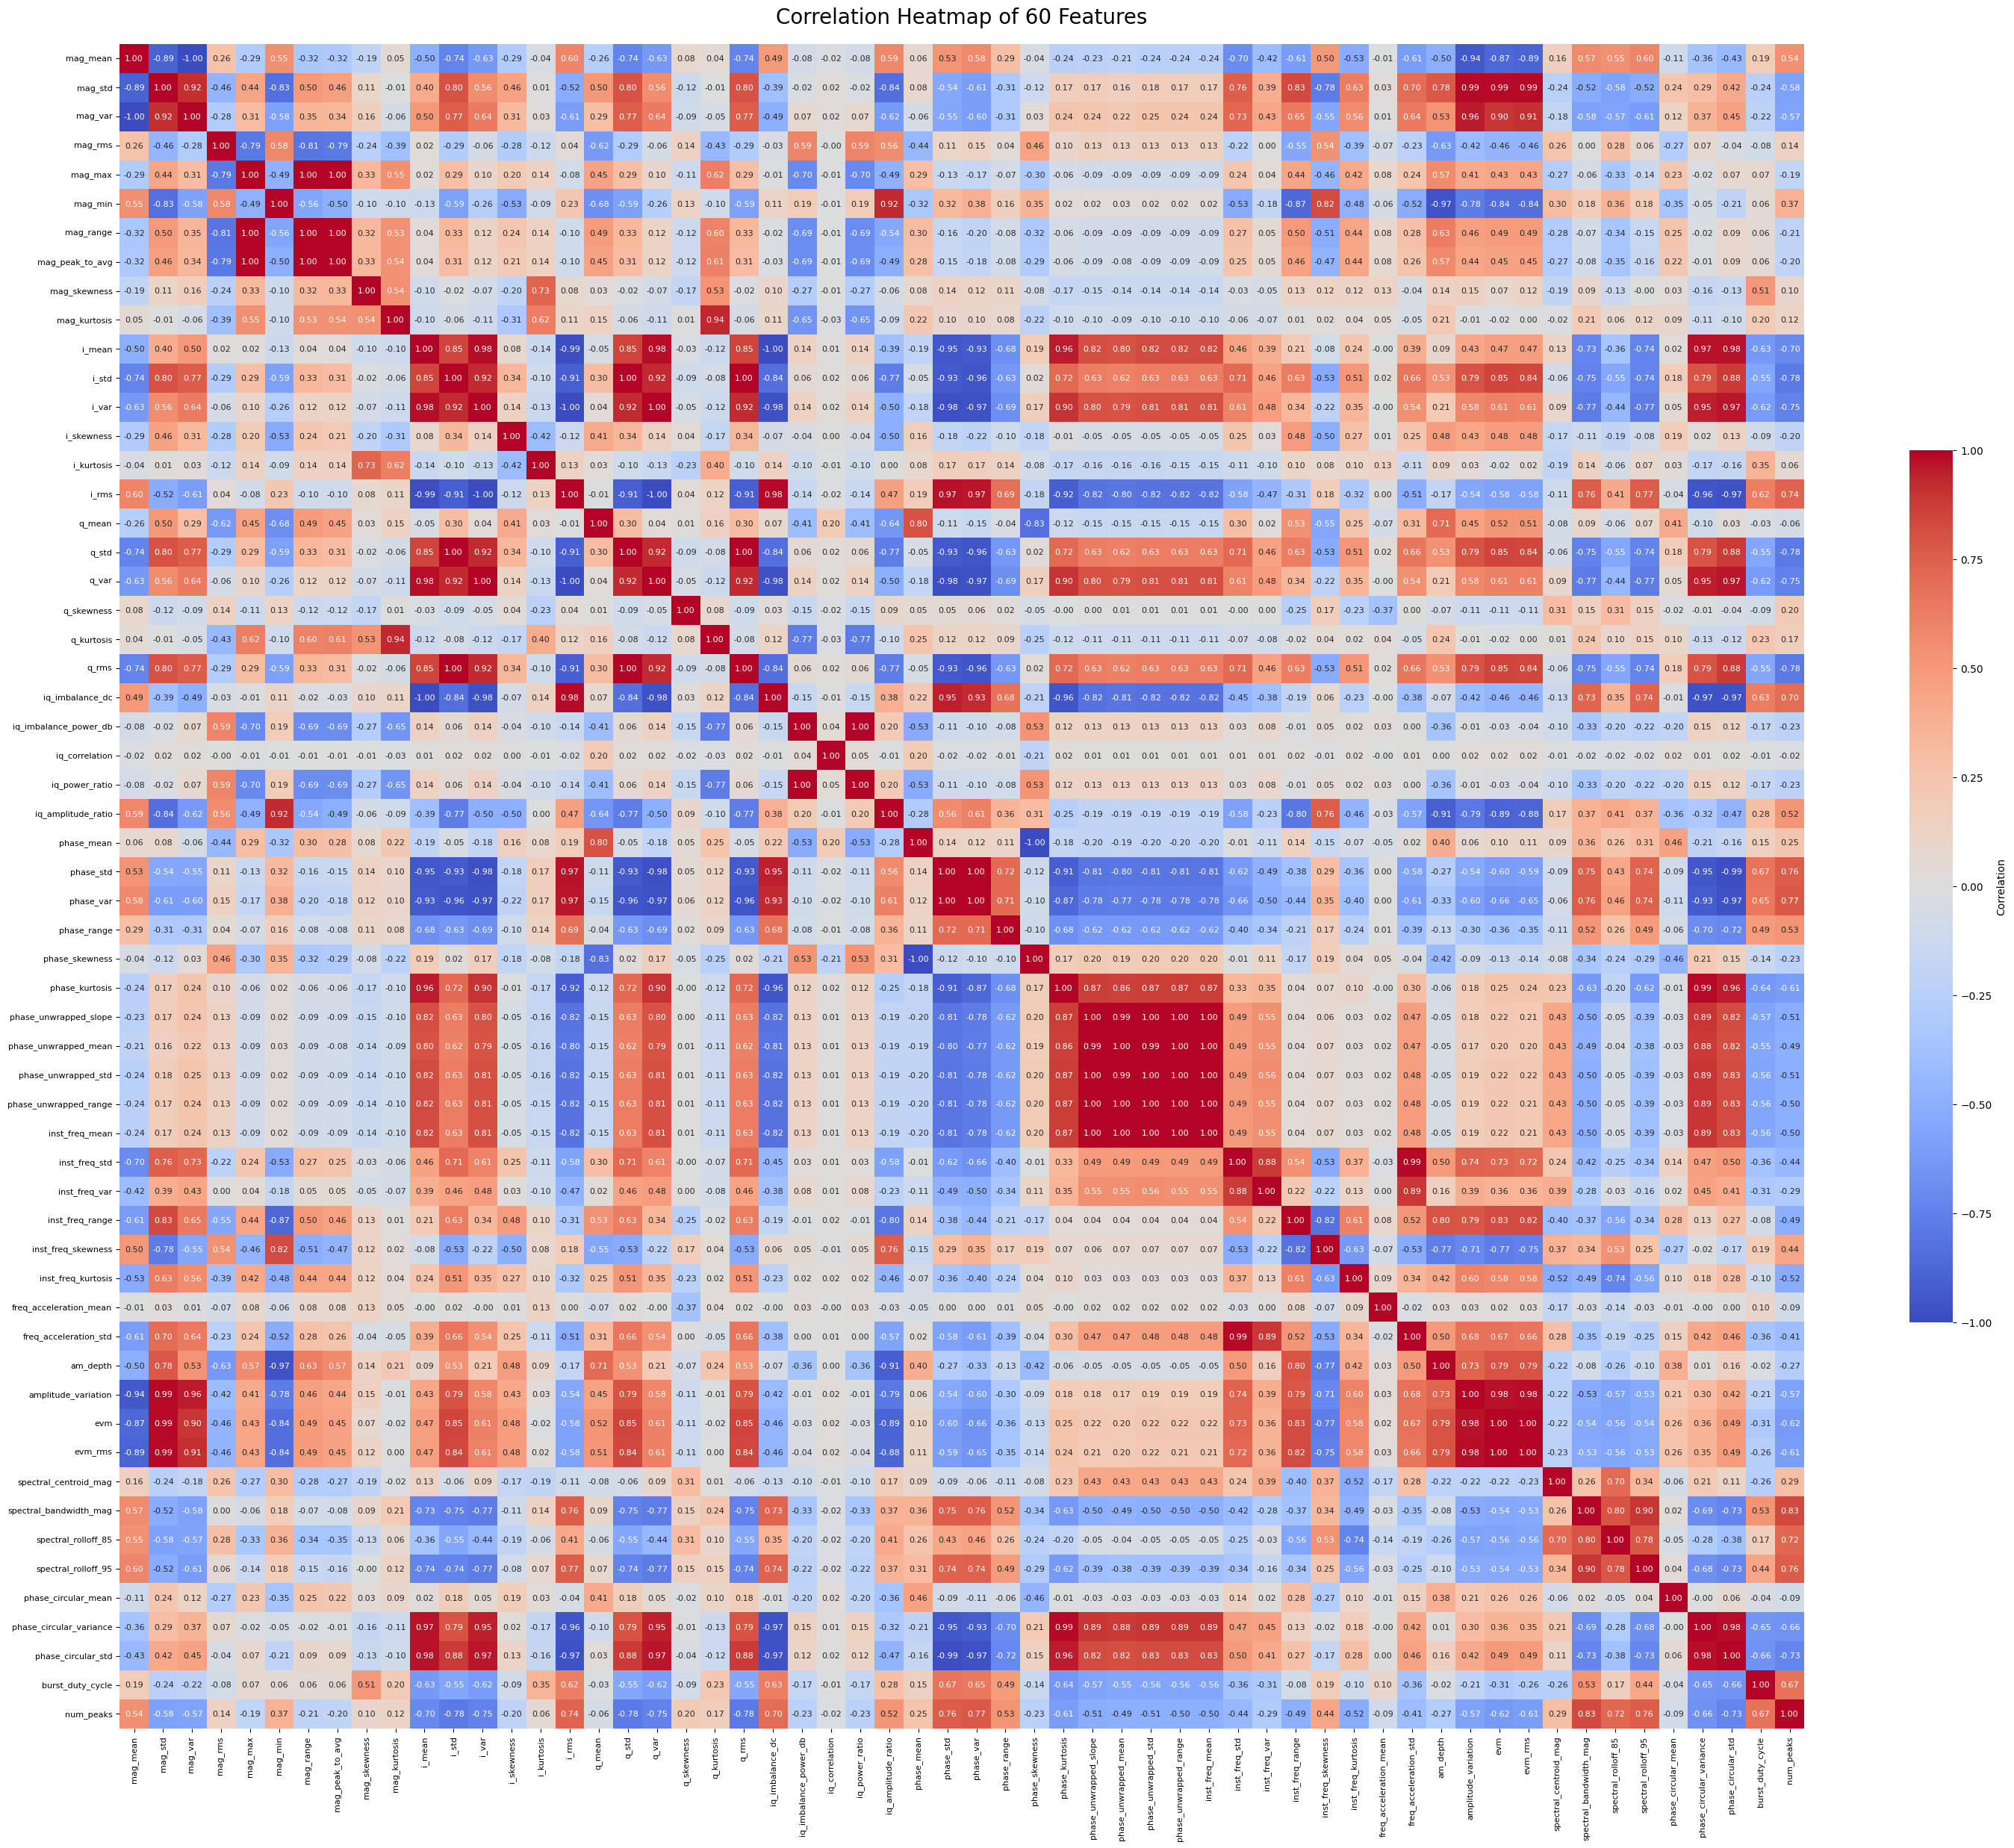

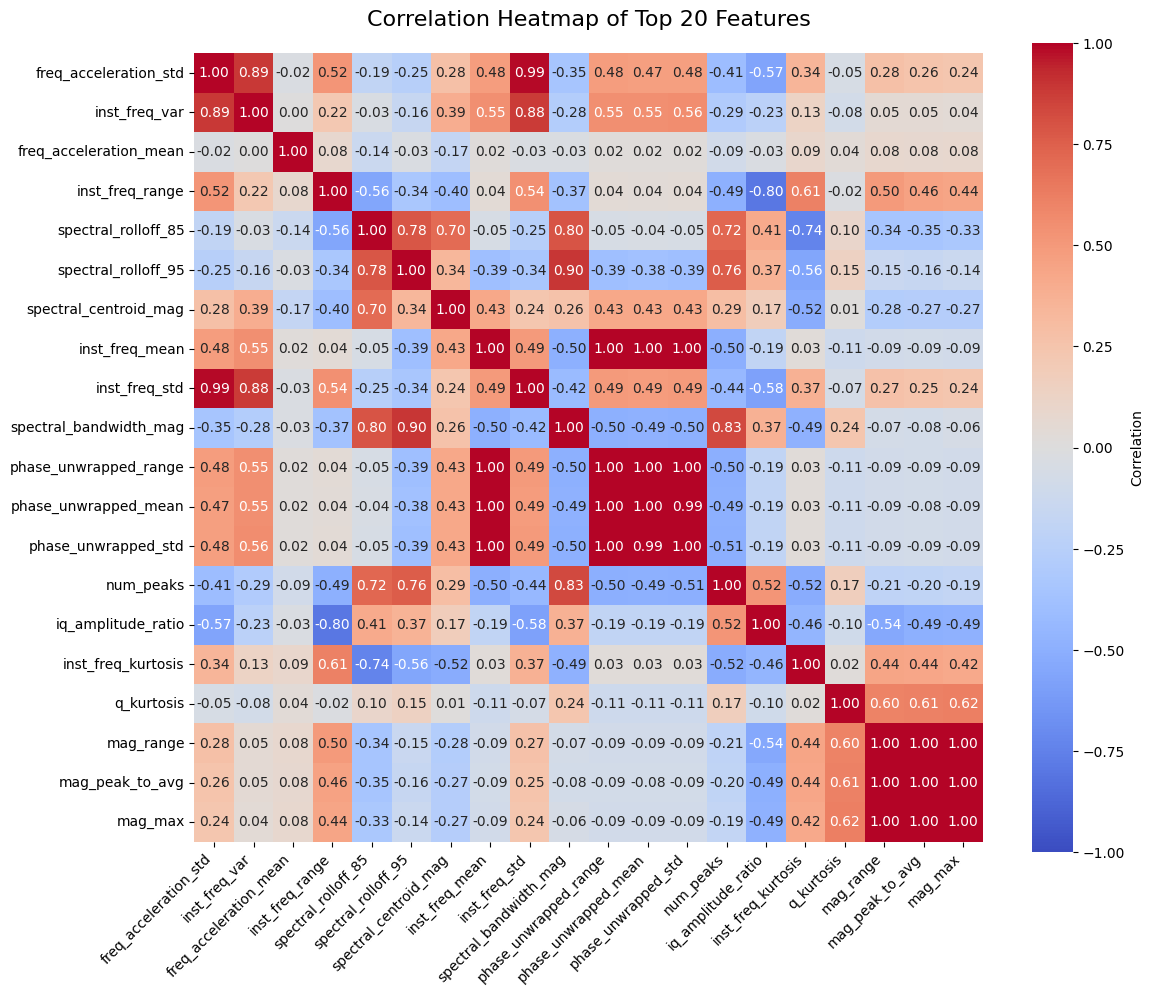

In [30]:

# Option 1: Full 60x60 Heatmap with Optimized Readability
plt.figure(figsize=(30, 25))  # Large figure size for 60 features
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Diverging color scheme
    vmin=-1, vmax=1, center=0,  # Correlation scale
    fmt='.2f',  # Two decimal places
    annot_kws={'size': 8},  # Smaller annotation size for 60 features
    square=True,  # Square cells
    cbar_kws={'label': 'Correlation', 'shrink': 0.5},  # Smaller colorbar
    xticklabels=corr_matrix.columns,  # Ensure all labels are shown
    yticklabels=corr_matrix.columns
)
plt.title('Correlation Heatmap of 60 Features', fontsize=20, pad=20)
plt.xticks(fontsize=8, rotation=90, ha='center')  # Rotate x-labels for readability
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Option 2: Subset Heatmap (e.g., top 20 features with highest variance)
# Select features with highest variance (or choose your own subset)
variances = rf_data_X.var().sort_values(ascending=False)
top_features = variances.head(20).index  # Top 20 features
corr_matrix_subset = rf_data_X[top_features].corr()

plt.figure(figsize=(12, 10))  # Smaller figure for subset
sns.heatmap(
    corr_matrix_subset,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1, center=0,
    fmt='.2f',
    annot_kws={'size': 10},  # Larger annotations for fewer features
    square=True,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Correlation Heatmap of Top 20 Features', fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
rf_data_X.skew()

mag_mean                   -7.057929
mag_std                     0.916980
mag_var                     5.398812
mag_rms                     0.000000
mag_max                     0.886147
mag_min                     0.935931
mag_range                   0.782914
mag_peak_to_avg             0.898481
mag_skewness                4.920115
mag_kurtosis                6.954731
i_mean                      6.566240
i_std                       2.170008
i_var                       5.026076
i_skewness                 -5.343217
i_kurtosis                 16.543595
i_rms                      -5.389959
q_mean                     -0.017941
q_std                       2.166955
q_var                       5.023699
q_skewness                  0.339187
q_kurtosis                  3.994191
q_rms                       2.165223
iq_imbalance_dc            -6.638664
iq_imbalance_power_db      -1.795842
iq_correlation             -0.030617
iq_power_ratio             -1.783218
iq_amplitude_ratio          1.139253
p

In [32]:
redundant_features = ['mag_max', 'mag_range', 'phase_unwrapped_mean', 'phase_unwrapped_std']

In [33]:
rf_data_X1=rf_data_X.drop(columns=redundant_features, errors='ignore')

In [34]:
rf_data_X2=rf_data_X1.copy()


In [35]:

# Ensure the key features exist
key_features = ['phase_unwrapped_range', 'mag_peak_to_avg', 'q_kurtosis', 'spectral_bandwidth_mag']
for feature in key_features:
    if feature not in rf_data_X2.columns:
        print(f"Warning: {feature} not found in rf_data_x. Check column names.")
        exit()

# Create interaction features
# 1. Multiplicative interaction
rf_data_X2['phase_range_x_peak_to_avg'] = rf_data_X2['phase_unwrapped_range'] * rf_data_X2['mag_peak_to_avg']

# 2. Ratio interaction (with protection against division by zero)
rf_data_X2['phase_range_div_peak_to_avg'] = rf_data_X2['phase_unwrapped_range'] / rf_data_X2['mag_peak_to_avg'].replace(0, np.finfo(float).eps)

# 3. Log-transformed multiplicative interaction
rf_data_X2['log_phase_range_x_log_peak_to_avg'] = (np.log1p(rf_data_X2['phase_unwrapped_range'].replace(0, np.finfo(float).eps)) * 
                                                np.log1p(rf_data_X2['mag_peak_to_avg'].replace(0, np.finfo(float).eps)))

# 4. Difference interaction
rf_data_X2['phase_range_minus_peak_to_avg'] = rf_data_X2['phase_unwrapped_range'] - rf_data_X2['mag_peak_to_avg']

# 5. Interaction with q_kurtosis
rf_data_X2['phase_range_x_q_kurtosis'] = rf_data_X2['phase_unwrapped_range'] * rf_data_X2['q_kurtosis']

# 6. Interaction with spectral_bandwidth_mag
rf_data_X2['peak_to_avg_x_spectral_bandwidth'] = rf_data_X2['mag_peak_to_avg'] * rf_data_X2['spectral_bandwidth_mag']

# Display the first few rows of new features
# print("New Interaction Features in rf_data_x:")
# print(rf_data_X[['phase_unwrapped_range', 'mag_peak_to_avg', 'q_kurtosis', 'spectral_bandwidth_mag'] + 
#                 ['phase_range_x_peak_to_avg', 'phase_range_div_peak_to_avg', 
#                  'log_phase_range_x_log_peak_to_avg', 'phase_range_minus_peak_to_avg', 
#                  'phase_range_x_q_kurtosis', 'peak_to_avg_x_spectral_bandwidth']].head())

# # Save the updated dataset with interactions
# rf_data_x.to_csv('rf_data_x_with_interactions.csv', index=False)

In [51]:
rf_data_X2.shape

(17548, 60)

In [38]:
rf_data_X1.shape

(17548, 54)

In [53]:
target=rf_data["device"]

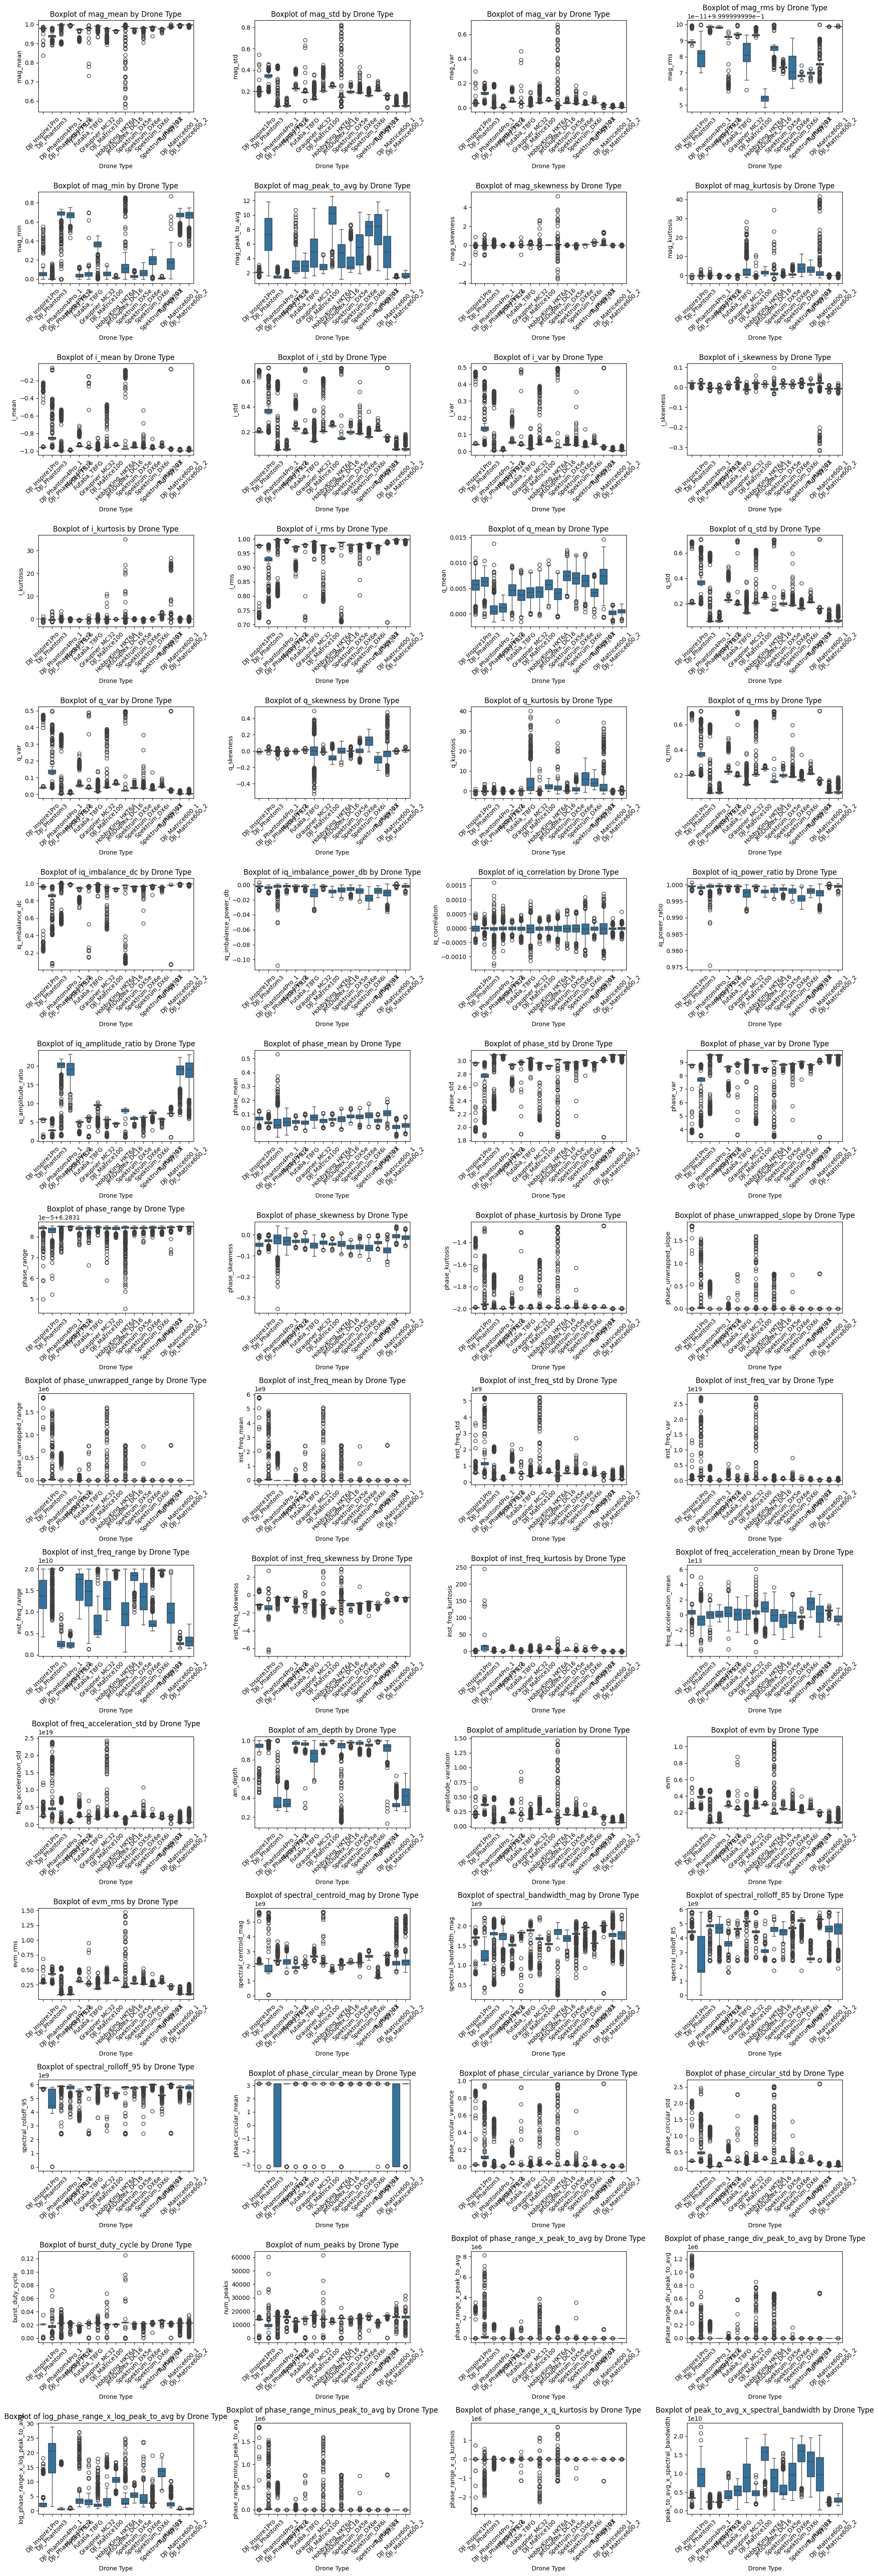

In [55]:

if len(target) != len(rf_data_X2):
    print(f"Warning: Length of target ({len(target)}) does not match rf_data_X2 ({len(rf_data_X2)}). Check alignment.")
    exit()

# Get all feature columns in rf_data_X2
features = rf_data_X2.columns.tolist()

# Determine the number of subplots needed
n_features = len(features)
n_cols = 4  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure with dynamic size
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust size based on grid

# Generate boxplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    # Convert target to a DataFrame column temporarily for seaborn
    plot_data = rf_data_X2.copy()
    plot_data['target'] = target  # Add target as a column for plotting
    sns.boxplot(x='target', y=feature, data=plot_data)
    plt.title(f'Boxplot of {feature} by Drone Type')
    plt.xlabel('Drone Type')
    plt.ylabel(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability if many types

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot and display
# plt.savefig('all_features_boxplots_rf_data_X2.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
rf_data_X2.describe()

mag_mean       mag_std       mag_var       mag_rms       mag_min  \
count  17548.000000  17548.000000  17548.000000  1.754800e+04  17548.000000   
mean       0.981960      0.170990      0.035384  1.000000e+00      0.228577   
std        0.019237      0.078399      0.035283  1.327663e-11      0.264720   
min        0.565397      0.048706      0.002372  1.000000e+00      0.000002   
25%        0.978221      0.125707      0.015802  1.000000e+00      0.026052   
50%        0.982242      0.187619      0.035201  1.000000e+00      0.079916   
75%        0.992067      0.207568      0.043085  1.000000e+00      0.394084   
max        0.998813      0.824819      0.680326  1.000000e+00      0.867071   

       mag_peak_to_avg  mag_skewness  mag_kurtosis        i_mean  \
count     17548.000000  17548.000000  17548.000000  17548.000000   
mean          4.259436      0.033504      0.895633     -0.950134   
std           2.965845      0.147752      2.441657      0.103078   
min           1.115612     -3.591871     -1.931476     -0.997081   
25%           1.988911     -0.011154     -0.016993     -0.983674   
50%           3.005520      0.005556      0.041084     -0.963040   
75%           6.381672      0.038444      0.867083     -0.954108   
max          12.599752      5.176722     41.701926     -0.054620   

              i_std  ...  phase_circular_variance  phase_circular_std  \
count  17548.000000  ...             17548.000000        17548.000000   
mean       0.181310  ...                 0.036499            0.220420   
std        0.101994  ...                 0.107709            0.260129   
min        0.053974  ...                 0.001469            0.054221   
25%        0.127129  ...                 0.008461            0.130365   
50%        0.190317  ...                 0.020257            0.202312   
75%        0.211642  ...                 0.026133            0.230132   
max        0.706051  ...                 0.965937            2.599823   

       burst_duty_cycle     num_peaks  phase_range_x_peak_to_avg  \
count      17548.000000  17548.000000               1.754800e+04   
mean           0.021821  14301.166173               4.627256e+04   
std            0.003845   2848.923669               3.262450e+05   
min            0.000000      0.000000               6.857587e-01   
25%            0.021305  13520.750000               4.915949e+00   
50%            0.022254  14627.000000               1.841236e+01   
75%            0.023066  16266.000000               1.113303e+02   
max            0.125042  61469.000000               8.122041e+06   

       phase_range_div_peak_to_avg  log_phase_range_x_log_peak_to_avg  \
count                 1.754800e+04                       17548.000000   
mean                  1.033003e+04                           4.633099   
std                   8.117725e+04                           5.301264   
min                   2.041541e-01                           0.354348   
25%                   5.977497e-01                           1.361507   
50%                   1.201141e+00                           2.619164   
75%                   7.953564e+00                           5.237211   
max                   1.255628e+06                          28.893273   

       phase_range_minus_peak_to_avg  phase_range_x_q_kurtosis  \
count                   1.754800e+04              1.754800e+04   
mean                    1.883911e+04             -2.044926e+04   
std                     1.343523e+05              1.846133e+05   
min                    -8.596976e+00             -2.682287e+06   
25%                    -6.601075e-01             -3.534926e-03   
50%                     5.042408e-01              5.411930e-01   
75%                     2.591932e+01              1.060040e+01   
max                     1.824507e+06              1.713450e+06   

       peak_to_avg_x_spectral_bandwidth  
count                      1.754800e+04  
mean                       7.167759e+09  
std                        4.951611e

In [59]:
rf_data_X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548 entries, 0 to 17547
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   mag_mean                           17548 non-null  float64
 1   mag_std                            17548 non-null  float64
 2   mag_var                            17548 non-null  float64
 3   mag_rms                            17548 non-null  float64
 4   mag_min                            17548 non-null  float64
 5   mag_peak_to_avg                    17548 non-null  float64
 6   mag_skewness                       17548 non-null  float64
 7   mag_kurtosis                       17548 non-null  float64
 8   i_mean                             17548 non-null  float64
 9   i_std                              17548 non-null  float64
 10  i_var                              17548 non-null  float64
 11  i_skewness                         17548 non-null  flo

In [63]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(rf_data_X2, target)
pd.Series(mi, index=rf_data_X2.columns).sort_values(ascending=False).head(15)


phase_circular_variance    1.846578
phase_circular_std         1.846549
i_var                      1.846502
i_std                      1.846430
i_mean                     1.844874
q_var                      1.844540
q_std                      1.844449
i_rms                      1.841191
q_rms                      1.841158
iq_amplitude_ratio         1.818375
phase_var                  1.806817
phase_std                  1.806779
mag_std                    1.803295
mag_var                    1.803221
mag_mean                   1.803199
dtype: float64

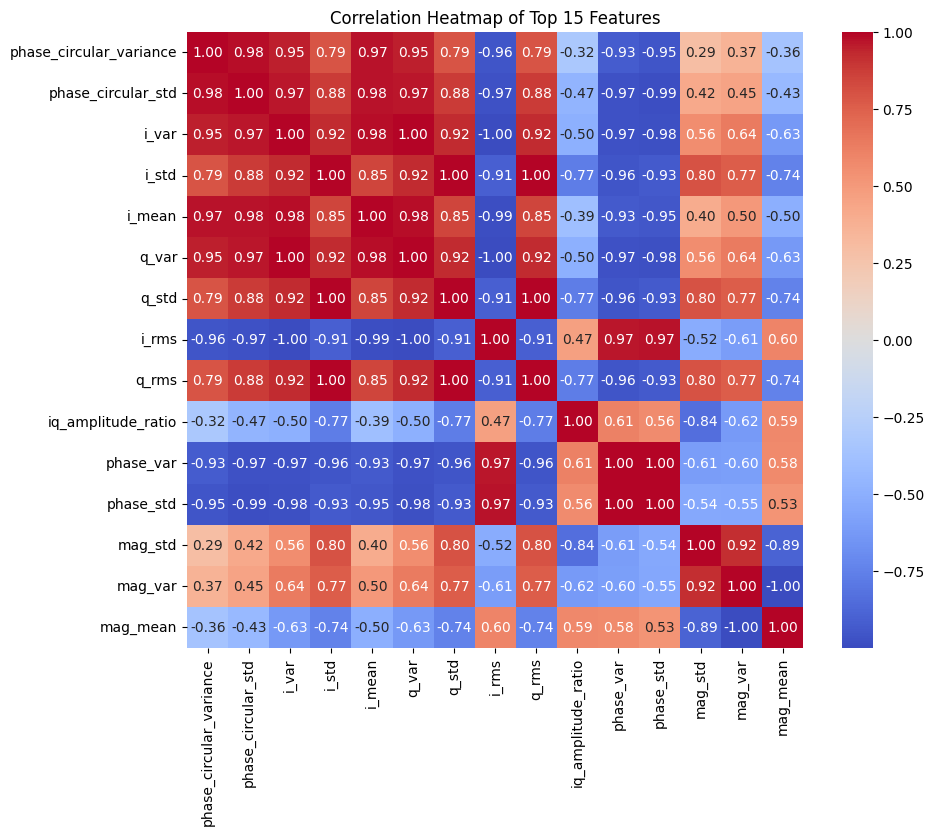

In [65]:
selected_features = [
    'phase_circular_variance', 'phase_circular_std', 'i_var', 'i_std', 'i_mean',
    'q_var', 'q_std', 'i_rms', 'q_rms', 'iq_amplitude_ratio',
    'phase_var', 'phase_std', 'mag_std', 'mag_var', 'mag_mean'
]

corr = rf_data_X2[selected_features].corr()  # correlation matrix

# Display heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Top 15 Features")
plt.show()

In [67]:
corr

phase_circular_variance  phase_circular_std  \
phase_circular_variance                 1.000000            0.980226   
phase_circular_std                      0.980226            1.000000   
i_var                                   0.948718            0.968314   
i_std                                   0.791865            0.876911   
i_mean                                  0.973688            0.975838   
q_var                                   0.948633            0.968299   
q_std                                   0.791646            0.876760   
i_rms                                  -0.959465           -0.972693   
q_rms                                   0.791527            0.876679   
iq_amplitude_ratio                     -0.320058           -0.473073   
phase_var                              -0.926234           -0.970273   
phase_std                              -0.952525           -0.985532   
mag_std                                 0.292291            0.419348   
mag_var                                 0.366662            0.447448   
mag_mean                               -0.359132           -0.433896   

                            i_var     i_std    i_mean     q_var     q_std  \
phase_circular_variance  0.948718  0.791865  0.973688  0.948633  0.791646   
phase_circular_std       0.968314  0.876911  0.975838  0.968299  0.876760   
i_var                    1.000000  0.923769  0.978079  1.000000  0.923605   
i_std                    0.923769  1.000000  0.847260  0.923913  0.999999   
i_mean                   0.978079  0.847260  1.000000  0.978027  0.847066   
q_var                    1.000000  0.923913  0.978027  1.000000  0.923749   
q_std                    0.923605  0.999999  0.847066  0.923749  1.000000   
i_rms                   -0.998748 -0.906584 -0.986794 -0.998732 -0.906409   
q_rms                    0.923511  0.999999  0.846960  0.923656  1.000000   
iq_amplitude_ratio      -0.497009 -0.771477 -0.393349 -0.497322 -0.771807   
phase_var               -0.973540 -0.956727 -0.932570 -0.973595 -0.956632   
phase_std               -0.976999 -0.932554 -0.950516 -0.977027 -0.932435   
mag_std                  0.558457  0.801503  0.403172  0.558735  0.801668   
mag_var                  0.635069  0.765192  0.502713  0.635243  0.765207   
mag_mean                -0.626593 -0.741341 -0.502537 -0.626751 -0.741345   

                            i_rms     q_rms  iq_amplitude_ratio  phase_var  \
phase_circular_variance -0.959465  0.791527           -0.320058  -0.926234   
phase_circular_std      -0.972693  0.876679           -0.473073  -0.970273   
i_var                   -0.998748  0.923511           -0.497009  -0.973540   
i_std                   -0.906584  0.999999           -0.771477  -0.956727   
i_mean                  -0.986794  0.846960           -0.393349  -0.932570   
q_var                   -0.998732  0.923656           -0.497322  -0.973595   
q_std                   -0.906409  1.000000           -0.771807  -0.956632   
i_rms                    1.000000 -0.906311            0.468587   0.966421   
q_rms                   -0.906311  1.000000           -0.772006  -0.956585   
iq_amplitude_ratio       0.468587 -0.772006            1.000000   0.613732   
phase_var                0.966421 -0.956585            0.613732   1.000000   
phase_std                0.973627 -0.932375            0.563172   0.996733   
mag_std                 -0.520797  0.801755           -0.842323  -0.608158   
mag_var                 -0.605611  0.765201           -0.618794  -0.599479   
mag_mean                 0.599409 -0.741334            0.585003   0.576153   

                         phase_std   mag_std   mag_var  mag_mean  
phase_circular_variance  -0.952525  0.292291  0.366662 -0.359132  
phase_circular_std       -0.985532  0.419348  0.447448 -0.433896  
i_var                    -0.976999  0.558457  0.635069 -0.626593  
i_std                    -0.932554  0.801503  0.765192 -0.741341  
i_mean                   -0.950516  0.403172  0.502713 

In [71]:
selected_features = [
    'i_rms',
    'phase_circular_std',
    'phase_var',
    'mag_std',
    'iq_amplitude_ratio'
]

In [73]:
rf_data_X3 = rf_data_X2[selected_features].copy()

In [75]:
from sklearn.preprocessing import LabelEncoder



# initialize label encoder
le = LabelEncoder()

# fit and transform the target
y_encoded = le.fit_transform(target)

# optional: check encoding map
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {'DJI_Inspire1Pro': 0, 'DJI_Matrice100': 1, 'DJI_Matrice600_1': 2, 'DJI_Matrice600_2': 3, 'DJI_Phantom3': 4, 'DJI_Phantom4Pro_1': 5, 'DJI_Phantom4Pro_2': 6, 'FlySky_FST6': 7, 'Futaba_T8FG': 8, 'Graupner_MC32': 9, 'HobbyKing_HKT6A': 10, 'JetiDuplex_DC16': 11, 'Spektrum_DX5e': 12, 'Spektrum_DX6e': 13, 'Spektrum_DX6i': 14, 'Spektrum_JRX9303': 15, 'Turnigy_9X': 16}


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# define model
rf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let it grow fully (you can tune later)
    random_state=42,
    n_jobs=-1
)

# use StratifiedKFold to preserve class balance
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(rf, rf_data_X, y_encoded, cv=cv, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation accuracies: [0.95840456 0.95897436 0.96068376 0.94700855 0.94301994 0.95612536
 0.96068376 0.95726496 0.94811859 0.96294185]
Mean accuracy: 0.9553225675460567


In [93]:
target.value_counts()


device
Graupner_MC32        1191
Futaba_T8FG          1149
DJI_Matrice600_1     1101
JetiDuplex_DC16      1049
Turnigy_9X           1048
DJI_Matrice600_2     1014
Spektrum_DX5e        1000
Spektrum_JRX9303     1000
Spektrum_DX6i        1000
Spektrum_DX6e        1000
HobbyKing_HKT6A      1000
DJI_Phantom3         1000
FlySky_FST6          1000
DJI_Phantom4Pro_2    1000
DJI_Phantom4Pro_1    1000
DJI_Inspire1Pro       999
DJI_Matrice100        997
Name: count, dtype: int64

In [95]:
counts = target.value_counts()
mean_count = counts.mean()
deviation = (counts - mean_count) / mean_count * 100
print(deviation)


device
Graupner_MC32        15.380670
Futaba_T8FG          11.311830
DJI_Matrice600_1      6.661728
JetiDuplex_DC16       1.624117
Turnigy_9X            1.527240
DJI_Matrice600_2     -1.766583
Spektrum_DX5e        -3.122863
Spektrum_JRX9303     -3.122863
Spektrum_DX6i        -3.122863
Spektrum_DX6e        -3.122863
HobbyKing_HKT6A      -3.122863
DJI_Phantom3         -3.122863
FlySky_FST6          -3.122863
DJI_Phantom4Pro_2    -3.122863
DJI_Phantom4Pro_1    -3.122863
DJI_Inspire1Pro      -3.219740
DJI_Matrice100       -3.413494
Name: count, dtype: float64


In [97]:
df.head(1)

normalized_rms  signal_length  sampling_rate  mag_mean   mag_std   mag_var  \
0            True        1000000   2.000000e+10  0.980348  0.197274  0.038917   

   mag_rms  mag_max   mag_min  mag_range  ...  spectral_rolloff_95  \
0      1.0  2.05252  0.022202   2.030318  ...         5.795898e+09   

   phase_circular_mean  phase_circular_variance  phase_circular_std  \
0             3.133368                 0.022537            0.213516   

   burst_duty_cycle  num_peaks  peak_prominence_mean           device  \
0          0.021521    14229.0                   0.0  DJI_Inspire1Pro   

      device_class                  filename  
0  DJI_Inspire1Pro  DJI_Inspire1Pro_0001.mat  

[1 rows x 65 columns]

In [99]:
df["device_class"].value_counts()

device_class
Graupner_MC32        1191
Futaba_T8FG          1149
DJI_Matrice600_1     1101
JetiDuplex_DC16      1049
Turnigy_9X           1048
DJI_Matrice600_2     1014
Spektrum_DX5e        1000
Spektrum_JRX9303     1000
Spektrum_DX6i        1000
Spektrum_DX6e        1000
HobbyKing_HKT6A      1000
DJI_Phantom3         1000
FlySky_FST6          1000
DJI_Phantom4Pro_2    1000
DJI_Phantom4Pro_1    1000
DJI_Inspire1Pro       999
DJI_Matrice100        997
Name: count, dtype: int64

In [101]:
rf_data_X1

mag_mean   mag_std   mag_var  mag_rms   mag_min  mag_peak_to_avg  \
0      0.980348  0.197274  0.038917      1.0  0.022202         2.093664   
1      0.979547  0.201217  0.040488      1.0  0.040849         2.101278   
2      0.979992  0.199037  0.039616      1.0  0.039672         2.112331   
3      0.979667  0.200632  0.040253      1.0  0.073675         1.979924   
4      0.980624  0.195897  0.038376      1.0  0.055234         1.966581   
...         ...       ...       ...      ...       ...              ...   
17543  0.978641  0.205574  0.042261      1.0  0.060684         5.123833   
17544  0.978078  0.208237  0.043363      1.0  0.034270         5.489221   
17545  0.977940  0.208884  0.043633      1.0  0.025179         7.171257   
17546  0.978801  0.204814  0.041949      1.0  0.036929         7.395959   
17547  0.978394  0.206749  0.042745      1.0  0.094621         6.536584   

       mag_skewness  mag_kurtosis    i_mean     i_std  ...   evm_rms  \
0         -0.014486     -0.039814 -0.959255  0.199702  ...  0.274941   
1         -0.013936     -0.042190 -0.957549  0.203796  ...  0.279611   
2         -0.018610     -0.037206 -0.958493  0.201570  ...  0.277097   
3         -0.025078     -0.072423 -0.957794  0.203241  ...  0.279119   
4         -0.019578     -0.031298 -0.959821  0.198316  ...  0.273407   
...             ...           ...       ...       ...  ...       ...   
17543     -0.018116     -0.046513 -0.955629  0.208167  ...  0.286218   
17544     -0.022442     -0.004271 -0.954374  0.210984  ...  0.289355   
17545     -0.005179      0.512486 -0.954095  0.211612  ...  0.289870   
17546     -0.001275      0.717784 -0.955943  0.207470  ...  0.284991   
17547     -0.010151      0.286998 -0.955080  0.209403  ...  0.287430   

       spectral_centroid_mag  spectral_bandwidth_mag  spectral_rolloff_85  \
0               2.215213e+09            1.746761e+09         4.565430e+09   
1               2.185224e+09            1.720553e+09         4.472656e+09   
2               2.158923e+09            1.730092e+09         4.482422e+09   
3               2.188827e+09            1.720883e+09         4.497070e+09   
4               2.178098e+09            1.743836e+09         4.521484e+09   
...                      ...                     ...                  ...   
17543           2.101322e+09            1.623168e+09         4.228516e+09   
17544           2.055575e+09            1.605529e+09         4.101562e+09   
17545           2.057309e+09            1.615993e+09         4.135742e+09   
17546           2.096007e+09            1.636996e+09         4.243164e+09   
17547           2.088751e+09            1.623555e+09         4.204102e+09   

       spectral_rolloff_95  phase_circular_mean  phase_circular_variance  \
0             5.795898e+09             3.133368                 0.022537   
1             5.776367e+09             3.135412                 0.023583   
2             5.771484e+09             3.136081                 0.023028   
3             5.786133e+09             3.137807                 0.023461   
4             5.786133e+09             3.135089                 0.022225   
...                    ...                  ...                      ...   
17543         5.703125e+09             3.133744                 0.024687   
17544         5.678711e+09             3.133723                 0.025492   
17545         5.683594e+09             3.133630                 0.025654   
17546         5.712891e+09             3.139282                 0.024565   
17547         5.698242e+09             3.135093                 0.025054   

       phase_circular_std  burst_duty_cycle  num_peaks  
0                0.213516          0.021521    14229.0  
1                0.218474          0.021654    14145.0  
2                0.215857          0.021346    13984.0  
3                0.217900          0.021074    14006.0  
4                0.212019          0.021535    14191.0  
...                   ...               ...        ...  
1754

In [159]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# define model
xgb = XGBClassifier(
    n_estimators=1000,       # number of trees
    max_depth=6,            # you can tune this later
    learning_rate=0.021,      # default 0.1
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    use_label_encoder=False,
    eval_metric='mlogloss',  # avoid warning in new XGBoost versions
    random_state=42,
    n_jobs=-1
)

# use StratifiedKFold to preserve class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(xgb, rf_data_X1, y_encoded, cv=cv, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Mean accuracy:", np.mean(scores))


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:09:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:10:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:11:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Cross-validation accuracies: [0.96923077 0.96153846 0.96239316 0.97093189 0.9660872 ]
Mean accuracy: 0.9660362973842597


In [111]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# define model
cat = CatBoostClassifier(
    iterations=800,          # number of trees
    depth=6,                 # tree depth
    learning_rate=0.1,       # step size
    random_seed=42,
    verbose=0                # suppress training output
)

# use StratifiedKFold to preserve class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(cat, rf_data_X, y_encoded, cv=cv, scoring='accuracy')

print("Cross-validation accuracies:", scores)
print("Mean accuracy:", np.mean(scores))


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.8/102.4 MB 1.0 MB/s eta 0:01:41
   ---------------------------------------- 1.0/102.4 MB 1.0 MB/s eta 0:01:37
    --------------------------------------- 1.3/102.4 MB 1.0 MB/s eta 0:01:37
    --------------------------------------- 1.3/102.4 MB 1.0 MB/s eta 0:01:37
    --------------------------------------- 1.6/102.4 MB 1.0 MB/s eta 0:01:39
    --------------------------------------- 1.8/102.4 MB 1.0 MB/s eta 0:01:40
    --------------------------------------- 2.1/102.4 MB 1.0 MB/s eta 0:01:39
    --------------------------------------- 2.1/102.4 MB 1.0 MB/s eta 0:01:39
    --------------------------------------- 2.4/102.4 MB 952.0 kB/s eta 0:01:46
    -

In [113]:
scores

array([0.96552707, 0.95783476, 0.95527066, 0.96665717, 0.96266743])

In [117]:
np.mean(scores)

0.961591414506775

In [121]:
rf_data_X1.shape

(17548, 54)

In [125]:
rf_data_X2.shape

(17548, 60)

In [127]:
rf_data_X2.head()

mag_mean   mag_std   mag_var  mag_rms   mag_min  mag_peak_to_avg  \
0  0.980348  0.197274  0.038917      1.0  0.022202         2.093664   
1  0.979547  0.201217  0.040488      1.0  0.040849         2.101278   
2  0.979992  0.199037  0.039616      1.0  0.039672         2.112331   
3  0.979667  0.200632  0.040253      1.0  0.073675         1.979924   
4  0.980624  0.195897  0.038376      1.0  0.055234         1.966581   

   mag_skewness  mag_kurtosis    i_mean     i_std  ...  \
0     -0.014486     -0.039814 -0.959255  0.199702  ...   
1     -0.013936     -0.042190 -0.957549  0.203796  ...   
2     -0.018610     -0.037206 -0.958493  0.201570  ...   
3     -0.025078     -0.072423 -0.957794  0.203241  ...   
4     -0.019578     -0.031298 -0.959821  0.198316  ...   

   phase_circular_variance  phase_circular_std  burst_duty_cycle  num_peaks  \
0                 0.022537            0.213516          0.021521    14229.0   
1                 0.023583            0.218474          0.021654    14145.0   
2                 0.023028            0.215857          0.021346    13984.0   
3                 0.023461            0.217900          0.021074    14006.0   
4                 0.022225            0.212019          0.021535    14191.0   

   phase_range_x_peak_to_avg  phase_range_div_peak_to_avg  \
0                  33.077467                     7.546027   
1                   7.231415                     1.637783   
2                   7.013613                     1.571874   
3                   5.649087                     1.441058   
4                   5.766353                     1.490999   

   log_phase_range_x_log_peak_to_avg  phase_range_minus_peak_to_avg  \
0                           3.186264                      13.705180   
1                           1.687510                       1.340160   
2                           1.661423                       1.207987   
3                           1.472861                       0.873261   
4                           1.488873                       0.965590   

   phase_range_x_q_kurtosis  peak_to_avg_x_spectral_bandwidth  
0                 -0.576976                      3.657130e+09  
1                 -0.161840                      3.615359e+09  
2                 -0.160075                      3.654529e+09  
3                 -0.199163                      3.407217e+09  
4                 -0.151670                      3.429395e+09  

[5 rows x 60 columns]

In [129]:
rf_data_X2.skew()

mag_mean                             -7.057929
mag_std                               0.916980
mag_var                               5.398812
mag_rms                               0.000000
mag_min                               0.935931
mag_peak_to_avg                       0.898481
mag_skewness                          4.920115
mag_kurtosis                          6.954731
i_mean                                6.566240
i_std                                 2.170008
i_var                                 5.026076
i_skewness                           -5.343217
i_kurtosis                           16.543595
i_rms                                -5.389959
q_mean                               -0.017941
q_std                                 2.166955
q_var                                 5.023699
q_skewness                            0.339187
q_kurtosis                            3.994191
q_rms                                 2.165223
iq_imbalance_dc                      -6.638664
iq_imbalance_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34644\2862768252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_data_X2["inst_freq_kurtosis"])


<Axes: xlabel='inst_freq_kurtosis', ylabel='Density'>

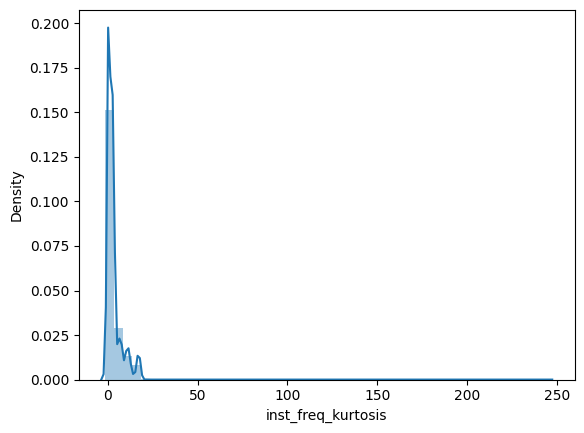

In [133]:
sns.distplot(rf_data_X2["inst_freq_kurtosis"])

In [147]:
rf_data_X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548 entries, 0 to 17547
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i_rms               17548 non-null  float64
 1   phase_circular_std  17548 non-null  float64
 2   phase_var           17548 non-null  float64
 3   mag_std             17548 non-null  float64
 4   iq_amplitude_ratio  17548 non-null  float64
dtypes: float64(5)
memory usage: 685.6 KB


In [153]:

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load the dataset and target (replace with your file path if different)

X = rf_data_X1
y = target

# Ensure target length matches dataset
if len(y) != len(rf_data_X1):
    print(f"Warning: Length of target ({len(y)}) does not match rf_data_X1 ({len(rf_data_X1)}). Check alignment.")
    exit()

# Normalize data for SVM (required for RBF kernel)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', probability=True, random_state=42, C=1.0, gamma='scale')  # RBF kernel
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create voting ensemble (soft voting for probability averaging)
ensemble = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting='soft')  # 'soft' uses predicted probabilities

# Set up stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform CV on the ensemble
cv_scores = cross_val_score(ensemble, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores) * 2:.3f})")

# Fit the ensemble on the full dataset (optional, if no separate test set)
ensemble.fit(X_scaled, y)

# Optional: Feature importance from Random Forest (for insight)
rf_model.fit(X_scaled, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("\nTop 10 Feature Importances from Random Forest:")
print(feature_importance.sort_values(by='Importance', ascending=False).head(10))

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:10:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:10:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:11:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Cross-Validation Accuracy Scores: [0.97920228 0.97578348 0.97521368 0.97948133 0.97777144]
Mean CV Accuracy: 0.977 (+/- 0.003)


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:12:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Top 10 Feature Importances from Random Forest:
                   Feature  Importance
3                  mag_rms    0.126753
45   spectral_centroid_mag    0.049490
12              i_kurtosis    0.042453
40   freq_acceleration_std    0.040342
35           inst_freq_var    0.030529
53               num_peaks    0.029507
46  spectral_bandwidth_mag    0.028073
48     spectral_rolloff_95    0.027127
32   phase_unwrapped_range    0.024043
17              q_skewness    0.023480


In [155]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    'rf__n_estimators': [100, 500],
    'xgb__learning_rate': [0.01,0.05, 0.1]
}

# Grid search with CV
grid_search = GridSearchCV(ensemble, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.3f}")

# Best model
best_ensemble = grid_search.best_estimator_

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:28:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'rf__n_estimators': 500, 'svm__C': 10, 'svm__gamma': 0.1, 'xgb__learning_rate': 0.1}
Best CV Score: 0.977



Model Comparison Table:

                    Model  Mean CV Score  Rank
Ensemble (SVM + XGB + RF)        0.97700     1
                 CatBoost        0.96159     2
                  XGBoost        0.96140     3
            Random Forest        0.95550     4


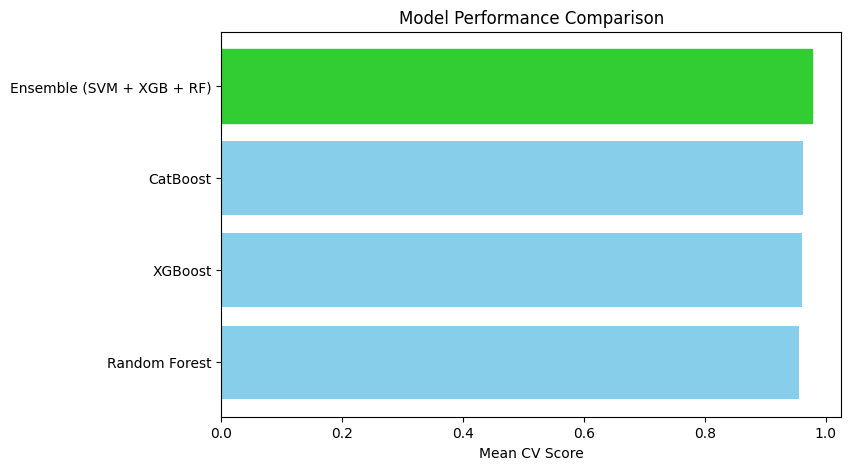

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Your CV results
data = {
    'Model': [
        'Random Forest',
        'CatBoost',
        'XGBoost',
        'Ensemble (SVM + XGB + RF)'
    ],
    'Mean CV Score': [
        0.9555,
        0.96159,
        0.9614,
        0.977
    ]
}

# Create DataFrame
cv_results = pd.DataFrame(data)

# Rank models (higher = better)
cv_results['Rank'] = cv_results['Mean CV Score'].rank(ascending=False).astype(int)

# Sort by rank
cv_results = cv_results.sort_values(by='Rank')

# Display table
print("\nModel Comparison Table:\n")
print(cv_results.to_string(index=False))

# Optional visualization
plt.figure(figsize=(8,5))
bars = plt.barh(cv_results['Model'], cv_results['Mean CV Score'], color='skyblue')
plt.xlabel('Mean CV Score')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()  # best model on top

# Highlight best model in green
best_idx = cv_results['Mean CV Score'].idxmax()
bars[list(cv_results.index).index(best_idx)].set_color('limegreen')

# Show chart
plt.show()


In [163]:
y

0        DJI_Inspire1Pro
1        DJI_Inspire1Pro
2        DJI_Inspire1Pro
3        DJI_Inspire1Pro
4        DJI_Inspire1Pro
              ...       
17543       DJI_Phantom3
17544       DJI_Phantom3
17545       DJI_Phantom3
17546       DJI_Phantom3
17547       DJI_Phantom3
Name: device, Length: 17548, dtype: object

In [167]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example for multiple models
models = {
    "Random Forest": rf,
    "CatBoost": cat,
    "XGBoost": xgb,
    "Ensemble": ensemble
}

plt.figure(figsize=(7,6))

for name, model in models.items():
    # Get out-of-fold predicted probabilities for positive class
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Reference line (no skill)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validation Based)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: multiclass format is not supported

<Figure size 700x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.utils.validation import check_is_fitted

# ---------- User inputs (replace these) ----------
# X, y : your full dataset (no train/test split)
# rf_model, cat_model, xgb_model, ensemble_model : your sklearn-like models (already initialized)
# -------------------------------------------------

models = {
    "Random Forest": rf,
    "CatBoost": cat,
    "XGBoost": xgb,
    "Ensemble (SVM + XGB + RF)": ensemble
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ensure labels are an integer-like set of classes
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)  # shape (n_samples, n_classes)
n_classes = y_bin.shape[1]

plt.figure(figsize=(8, 7))

summary_stats = []  # to print AUCs afterwards

for name, model in models.items():
    print(f"\nProcessing model: {name}")

    # cross_val_predict to get out-of-fold predictions.
    # Prefer predict_proba, fallback to decision_function.
    try:
        # method='predict_proba' will fail if model doesn't support it
        y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
        # If predict_proba returns shape (n_samples, ) or something, fix below (should be (n_samples, n_classes))
    except Exception as e_proba:
        try:
            # Try decision_function (some models like SVM)
            y_dec = cross_val_predict(model, X, y, cv=cv, method='decision_function')
            # If decision_function returns shape (n_samples,) for binary, convert to 2-column probability-like scores
            if y_dec.ndim == 1:
                # binary case -> convert to two-column scores
                y_pred_proba = np.vstack([1 - (1/(1 + np.exp(y_dec))), 1/(1 + np.exp(-y_dec))]).T
            else:
                # multiclass decision_function usually returns (n_samples, n_classes)
                # convert to "scores" but they don't need to be probabilities for roc_curve
                y_pred_proba = y_dec
        except Exception as e_dec:
            raise RuntimeError(
                f"Model {name} does not support predict_proba or decision_function for cross_val_predict.\n"
                "You can wrap it in a VotingClassifier with predict_proba or enable probability=True for SVM."
            )

    # At this point y_pred_proba should be shape (n_samples, n_classes)
    # If it's shape (n_samples,) then it's binary raw scores -> convert to 2-col
    if y_pred_proba.ndim == 1:
        # convert to two-column by applying a sigmoid (scores) to get something reasonable
        scores = 1 / (1 + np.exp(-y_pred_proba))
        y_pred_proba = np.vstack([1 - scores, scores]).T

    # If number of columns doesn't match number of classes, try to handle:
    if y_pred_proba.shape[1] != n_classes:
        # Attempt: if binary but classes==2, expand; else raise for clarity
        if n_classes == 2 and y_pred_proba.shape[1] == 1:
            scores = y_pred_proba.ravel()
            y_pred_proba = np.vstack([1 - scores, scores]).T
        else:
            raise ValueError(
                f"Predicted scores shape {y_pred_proba.shape} doesn't match number of classes {n_classes} for model {name}."
            )

    # compute ROC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # compute micro-average ROC (treat all classes jointly)
    fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
    auc_micro = auc(fpr_micro, tpr_micro)

    # compute macro-average AUC (simple average of per-class AUCs)
    auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])

    summary_stats.append((name, auc_micro, auc_macro))

    # Plot micro-average ROC for this model
    plt.plot(fpr_micro, tpr_micro, linewidth=2, label=f'{name} (micro AUC = {auc_micro:.3f}, macro AUC = {auc_macro:.3f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Comparison (Micro-average from CV predictions)')
plt.legend(loc='lower right', fontsize='small')
plt.grid(alpha=0.3)
plt.show()

# Print summary table of AUCs
print("\nModel AUC summary (from CV out-of-fold predictions):")
print("{:40s} {:>10s} {:>12s}".format("Model", "Micro AUC", "Macro AUC"))
for name, auc_micro, auc_macro in summary_stats:
    print("{:40s} {:10.4f} {:12.4f}".format(name, auc_micro, auc_macro))


NameError: name 'rf' is not defined